# SubPlots

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
linear = np.arange(1,9)
exponential = linear**2

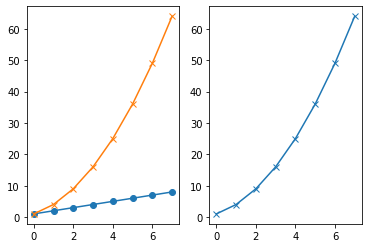

In [3]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(linear, '-o')

plt.subplot(1,2,2)
plt.plot(exponential, '-x')

plt.subplot(1,2,1)
plt.plot(exponential, '-x')


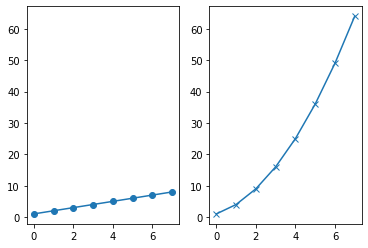

In [4]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear, '-o')

ax2= plt.subplot(1,2,2, sharey=ax1)
plt.plot(exponential, '-x')

True

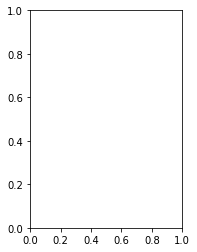

In [5]:
plt.figure()
plt.subplot(1,2,1) == plt.subplot(121) 

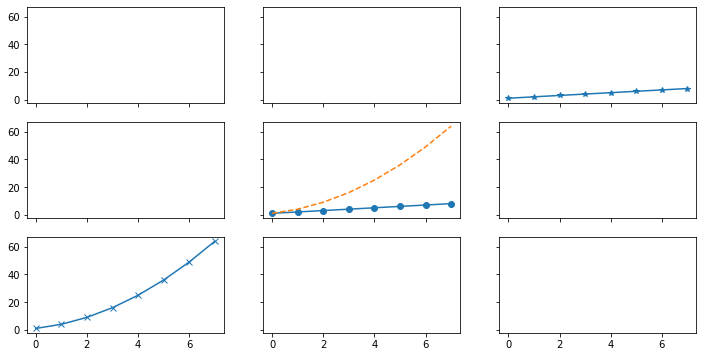

In [6]:
fig , ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True, sharey=True, figsize=(12,6))


ax3.plot(linear, '-*')
ax7.plot(exponential, '-x')
ax5.plot(linear, '-o', exponential, '--');


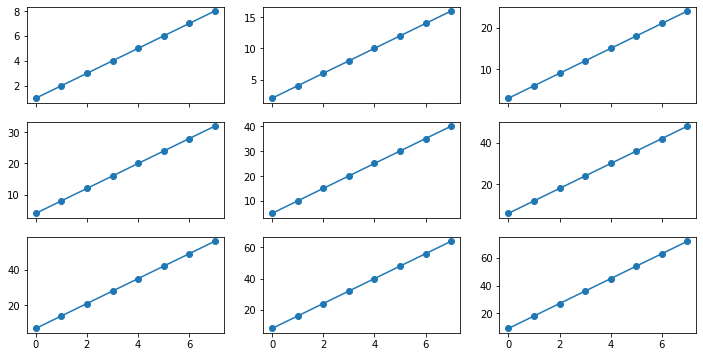

In [7]:
fig , ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(12,6),sharex=True)
axs = [ax1,ax2,ax3, ax4,ax5,ax6, ax7,ax8,ax9]
for i in range(9):
    axs[i].plot(linear * (i+1), '-o')

# Histogram

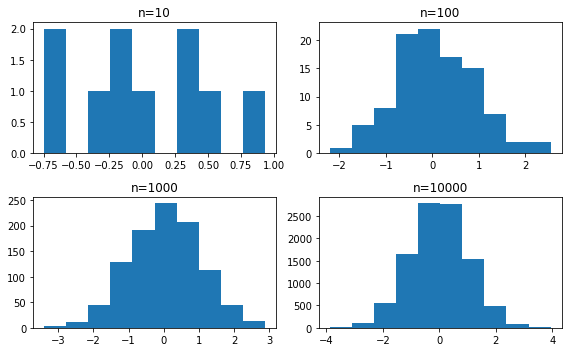

In [8]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(8,5))
axs = [ax1,ax2,ax3,ax4]

for i in range(len(axs)):
    sample_size = 10**(i+1)
    sample = np.random.normal(size=sample_size)
    axs[i].hist(sample)
    axs[i].set_title('n={}'.format(sample_size))
    
plt.tight_layout()

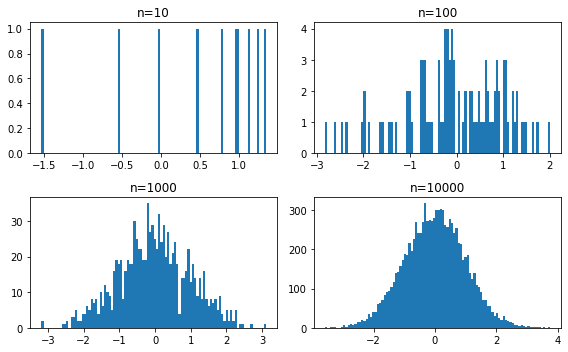

In [9]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(8,5))
axs = [ax1,ax2,ax3,ax4]

for i in range(len(axs)):
    sample_size = 10**(i+1)
    sample = np.random.normal(size=sample_size)
    axs[i].hist(sample,bins=100)
    axs[i].set_title('n={}'.format(sample_size))
    
plt.tight_layout()

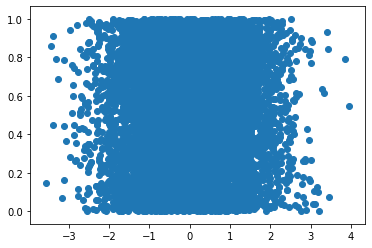

In [10]:
X = np.random.normal(size=10000)
Y = np.random.random(10000)
plt.scatter(X,Y)

In [11]:
from matplotlib.gridspec import GridSpec

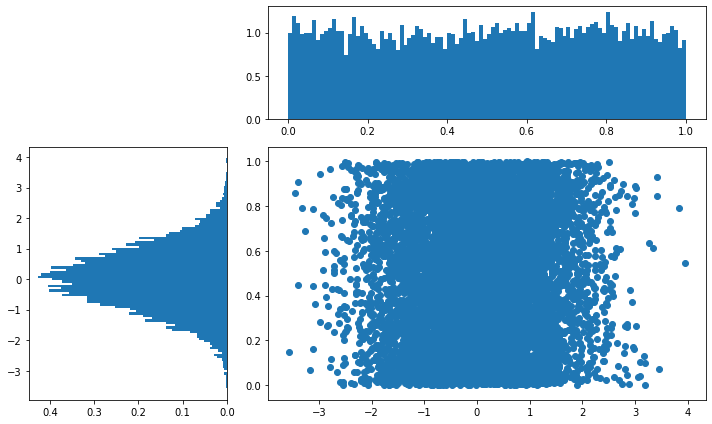

In [12]:
plt.figure(figsize=(10,6))
gridspec = GridSpec(3,3)

top_hist = plt.subplot(gridspec[0,1:])
side_hist = plt.subplot(gridspec[1:,0])
lower_right = plt.subplot(gridspec[1:,1:])

lower_right.scatter(X,Y)
top_hist.hist(Y, bins=100)
side_hist.hist(X, orientation='horizontal', bins=100)


top_hist.clear()
top_hist.hist(Y, normed=True, bins=100)
side_hist.clear()
side_hist.hist(X, bins=100, orientation='horizontal', normed=True)
side_hist.invert_xaxis()

plt.tight_layout()

# Boxplot

In [13]:
random = np.random.random(10000)
normal = np.random.normal(size=10000)
gamma = np.random.gamma(2,size=10000)

In [14]:
df = pd.DataFrame({'normal':normal, 'random':random, 'gamma': gamma
             })

In [15]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.009577,0.502022,1.984324
std,1.007256,0.287154,1.394795
min,-3.905114,0.000351,0.005905
25%,-0.669516,0.253451,0.956783
50%,0.003395,0.502761,1.665810
75%,0.683065,0.751584,2.680948
max,3.630901,0.999923,12.693568


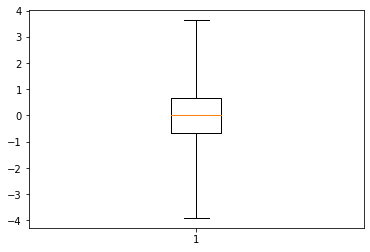

In [16]:
_=plt.boxplot(df['normal'], whis='range')

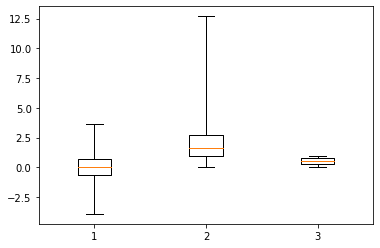

In [17]:
_=plt.boxplot([df['normal'],df['gamma'], df['random']], whis='range')

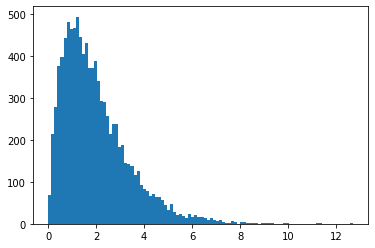

In [18]:
plt.hist(df['gamma'], bins=100);

In [19]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

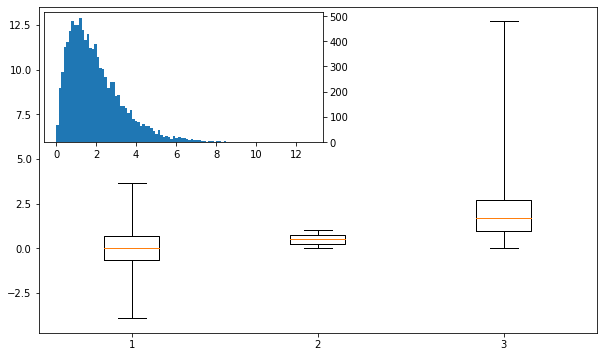

In [20]:
plt.figure(figsize=(10,6))
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='50%', height='40%', loc=2)
# ax2.scatter(df['gamma'],df['normal'])
ax2.hist(df['gamma'], bins=100)
ax2.yaxis.tick_right();

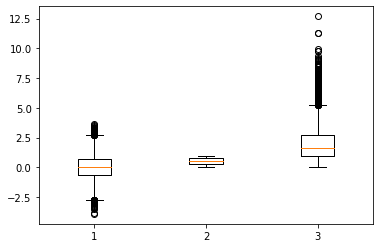

In [21]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

In [22]:
X = np.random.normal(size=10000)
Y = np.random.random(10000)

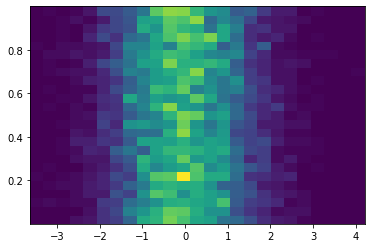

In [23]:
plt.hist2d(X,Y,bins=25);

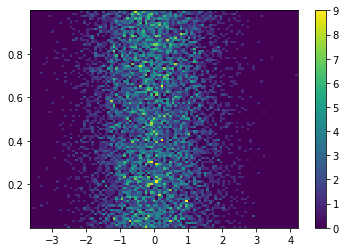

In [24]:
plt.hist2d(X,Y,bins=100)
plt.colorbar();

# Animations

In [39]:
import matplotlib.animation as animation
n = 100
x = np.random.randn(n)

<IPython.core.display.Javascript object>


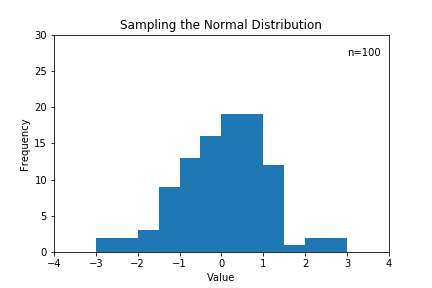

In [46]:
def update(curr):
    
    if curr == n:
        a.event_source.stop()  
    plt.cla()
    bins = np.arange(-4,4,0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.annotate('n={}'.format(curr), [3,27])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    
    

fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


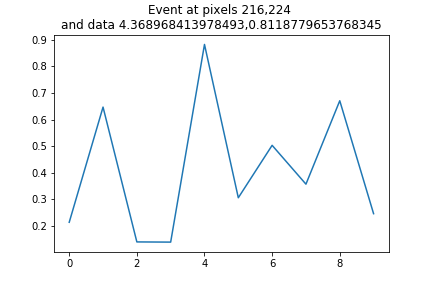

7

In [65]:
%matplotlib notebook
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [61]:
origins = ['USA', 'Canada', 'UK', 'Germany', 'Spain', 'China', 'Russia', 'Pakistan', 'Iran', 'India']

from random import shuffle
shuffle(origins)
df=pd.DataFrame({'height': np.random.randn(len(origins)), 'weight':np.random.randn(len(origins)), 'origin':origins })


In [62]:
df

,height,weight,origin
0,-1.232602,0.461080,Pakistan
1,-0.202170,-0.508756,India
2,-0.411756,1.005150,China
3,-0.680166,2.312343,Canada
4,1.610060,0.191855,USA
5,0.625311,-0.348455,Spain
6,2.006412,0.224235,Iran
7,-1.569782,0.480766,Germany
8,1.169019,0.237815,UK
9,0.131094,0.423515,Russia


<IPython.core.display.Javascript object>


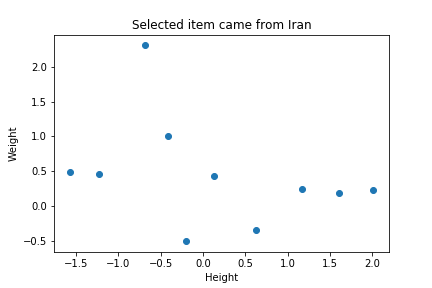

7

In [66]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)